In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("/content/note.jpg")

(-0.5, 1499.5, 791.5, -0.5)

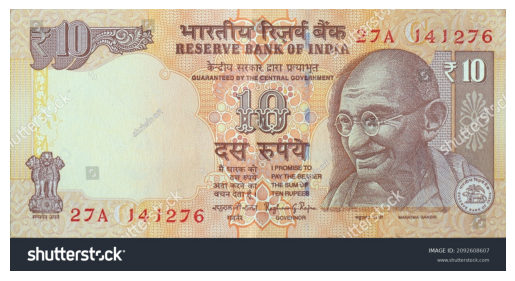

In [ ]:
plt.imshow(img[:,:,::-1], cmap="gray")
plt.axis('off')

In [ ]:
b,g,r = cv2.split(img)

In [ ]:
def hidden_message_to_binary(hidden_message, end_character="!"):
  """
  Converts the hidden message to binary format
  hidden_message (string): the message to be encoded
  end character (character): the character which describes the end of sentence (Default is "!")
  """
  # end the end character
  hidden_message = hidden_message + end_character # hidden_message is defined as an argument
  # convert the characters to their ascii values
  ascii_values = list(hidden_message.encode("ascii"))
  # convert the ascii values to binary representation
  hidden_message_binary = [np.binary_repr(ascii_code, width=8) for ascii_code in ascii_values]
  # join the elements in the list to form a string
  hidden_message_binary = "".join([np.binary_repr(ascii_code, width=8) for ascii_code in ascii_values])
  # convert it to a numpy array of dtype "int64"
  hidden_message_binary= np.array(list(hidden_message_binary), dtype="int64")

  return hidden_message_binary

In [ ]:
# test the above function
sample_hidden_message = "They are going to rob the bank"
binary_message = hidden_message_to_binary(sample_hidden_message)
print(binary_message)
print("Length of input sentence - ", len(sample_hidden_message))
print("Length of binary conversion - ", len(binary_message))
assert len(binary_message) == 8*(len(sample_hidden_message)+1) # +1 for end character

[0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1
 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1
 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0
 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1]
Length of input sentence -  30
Length of binary conversion -  248


In [ ]:
def bitPlaneSlicing(img_pixel, bit_plane):
  """
   img: gray scale image
bit_plane: sliced place given as output
1 -> least significant bit plane
8 -> most significant bit plane
"""
# Convert the single pixel value to binary representation
  dec = np.binary_repr(img_pixel, width = 8)
  # Extract the desired bit plane
  return int(dec[8-bit_plane])


(-0.5, 1499.5, 791.5, -0.5)

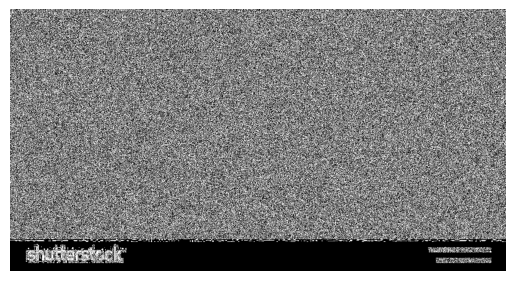

In [ ]:
bitPlaneSlicingVec = np.vectorize(bitPlaneSlicing)
# extracting the lowest bit plane out of the blue channel of the image
l_plane = bitPlaneSlicingVec(b, 1)
l_plane.shape
plt.imshow(l_plane, cmap="gray")
plt.axis('off')

In [ ]:
def add_code_to_bit_plane(bit_plane, binary_message):
  """
Takes input as the bit plane and binary message
and encodes the message to the bit plane.
Arguments:
bit_plane (np.ndarray): the bit plane which is returned by the func bitPlaneSlicing
binary message (np.ndarray): the binary form of hidden message as returned by
hidden_message_to_binary
"""
  bit_plane_flattened = bit_plane.flatten()
  len_binary_coded = len(binary_message)
  bit_plane_flattened[:len_binary_coded] = binary_message
  bit_plane_coded = bit_plane_flattened.reshape(bit_plane.shape)
  return bit_plane_coded

# Assuming 'l_plane' from your previous code snippet is the bit plane you want to use
# and 'binary_message' is your encoded message.
coded_bit_plane = add_code_to_bit_plane(l_plane, binary_message)


In [ ]:
l_plane_coded = add_code_to_bit_plane(l_plane, binary_message)
l_plane_coded.shape

(792, 1500)

In [ ]:
def add_bit_plane_back_to_image(img, bit_plane):
    """
    Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
    """
    #Indenting the code with 4 spaces to ensure readability and execution
    lst = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits
    """
    We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
    """
    # Multiply with 2^(n-1) and reshape to reconstruct the bit image.
    eight_bit_img=(np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
    seven_bit_img=(np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
    six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
    five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
    four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
    three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
    two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
    final_image = eight_bit_img + seven_bit_img + six_bit_img + five_bit_img + four_bit_img + three_bit_img + two_bit_img + bit_plane.astype("uint8") #Added type casting to bit_plane to avoid type error
    return final_image

In [ ]:
final_image_b = add_bit_plane_back_to_image(b, l_plane_coded)

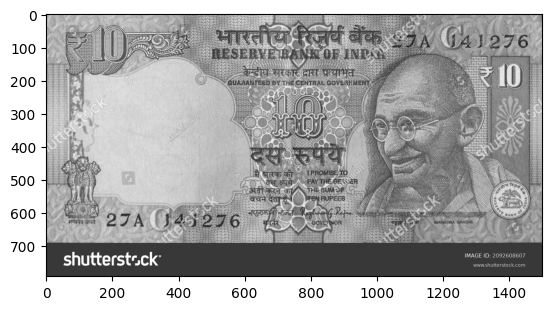

In [ ]:
plt.imshow(final_image_b, cmap="gray")

In [ ]:
final_image_bgr = cv2.merge((final_image_b, g, r))


In [ ]:
cv2.imwrite("coded_image.png", final_image_bgr)

True

In [ ]:
final_image_bgr.shape

(792, 1500, 3)

In [ ]:
def binary_repr_to_ch(binary_array):
  binary_value = "".join(binary_array.astype('str'))
  ascii_code=int(binary_value, 2)
  character=chr(ascii_code)
  return character

In [ ]:
def get_message_from_plane(plane, end_character = "!"):
    plane_flatten = plane.flatten()
    plane_flatten = plane_flatten[:len(plane_flatten) - len(plane_flatten)%8]
    plane_reshaped = plane_flatten.reshape(-1, 8)

    sentence = []

    for binary_repr in plane_reshaped:
        character = binary_repr_to_ch(binary_repr)
        if character == end_character:
           break
        sentence.append(character)
    return "". join(sentence)


In [ ]:
def decode_image(image, end_character="!"):
  """
    image: single channel image, where message is being hidden in the lowest bit plane
    end character: the character denoting the end of hidden message
  """
  first_channel, _, _ = cv2.split(image) # Removed extra indentation here
  lowest_bit_plane = bitPlaneSlicingVec(first_channel, 1)
  message = get_message_from_plane(lowest_bit_plane)
  return message

In [ ]:
decode_image(final_image_bgr)

'They are going to rob the bank'

In [ ]:
encoded_img = cv2.imread("coded_image.png")



In [ ]:
encoded_img.shape

(792, 1500, 3)

In [ ]:
decode_image(encoded_img)

'They are going to rob the bank'